In [ ]:
!pip install kora -q
!pip install selenium

     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 81.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 35.3 MB/s 
     |████████████████████████████████| 384 kB 75.0 MB/s 
     |████████████████████████████████| 140 kB 78.3 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
import selenium
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 

In [ ]:

dataset=[]

In [ ]:
url="https://www.tripadvisor.in/Restaurant_Review-g304558-d2625736-Reviews-Golden_Joy-Kolkata_Calcutta_Kolkata_District_West_Bengal.html"
browser.get(url)
xx= browser.find_elements(By.XPATH,"//span[@class='taLnk ulBlueLinks']")
def click(p):
  try:
    p.click()
  except:
    pass
  
d_x=[click(x) for x in xx]

containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="reviewSelector"]')]

for container in containers:
  rev1=dict()
  bsObj=BeautifulSoup(container)
  rev=bsObj.find('div',attrs={"class":"prw_rup prw_reviews_text_summary_hsx"}).text 
  dataset.append(rev)

In [ ]:
dataset

['Heard lot about the place! Was disappointed with food and ambience. Not sure what ws all the rush about. Food was average in taste. Tried golden fried prawns as well. Portion size was good but the taste was average. If you want chinese food there may be other great options! Show less',
 'Had lunch here today. Starters included Chili Pork, Chicken Lollipop and Fooyong. The Fooyong was forgettable as was the Lollipop. Pork was decent.Main courses included Meifoon Rice Noodles (good) and Lemon Chicken (acceptable).All said, not a bad place to dine, but only if you have no other options.Show less',
 'Food was not good and tasty , restaurant was over crowded , staffs were pathetic , shouting in front of customers. Used to be very good but my last visit was a big disappointment.',
 'Mostly local young crowd visit this place considering alcohol being quite reasonably priced. Super lousy, terrible ambience, horrible service and below par food quality. Only good for a quick couple of standard

In [ ]:
for i in range(1,200):
    c=15*i
    url=f"https://www.tripadvisor.in/Restaurant_Review-g304558-d2625736-Reviews-or{c}-Golden_Joy-Kolkata_Calcutta_Kolkata_District_West_Bengal.html"
    browser.get(url)
    xx= browser.find_elements(By.XPATH,"//span[@class='taLnk ulBlueLinks']")
    def click(p):
        try:
            p.click()
        except:
            pass
    d_x=[click(x) for x in xx]
    containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="reviewSelector"]')]
    for container in containers:
        rev1=dict()
        bsObj=BeautifulSoup(container)
        rev=bsObj.find('div',attrs={"class":"prw_rup prw_reviews_text_summary_hsx"}).text 
        dataset.append(rev)

In [ ]:
len(dataset) 

2987

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-10-15 07:30:14.514245: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 10 kB/s 
     |████████████████████████████████| 127 kB 32.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatib

In [ ]:
import spacy

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
nlp=spacy.load('en_core_web_lg')

In [ ]:

t=" ".join(dataset)

In [ ]:
t

'Heard lot about the place! Was disappointed with food and ambience. Not sure what ws all the rush about. Food was average in taste. Tried golden fried prawns as well. Portion size was good but the taste was average. If you want chinese food there may be other great options! Show less Had lunch here today. Starters included Chili Pork, Chicken Lollipop and Fooyong. The Fooyong was forgettable as was the Lollipop. Pork was decent.Main courses included Meifoon Rice Noodles (good) and Lemon Chicken (acceptable).All said, not a bad place to dine, but only if you have no other options.Show less Food was not good and tasty , restaurant was over crowded , staffs were pathetic , shouting in front of customers. Used to be very good but my last visit was a big disappointment. Mostly local young crowd visit this place considering alcohol being quite reasonably priced. Super lousy, terrible ambience, horrible service and below par food quality. Only good for a quick couple of standard drinks. Loca

In [ ]:
nlp.max_length = 1125197

In [ ]:
texts=nlp(t)

In [ ]:

for token in texts[:20]: 
  print(token.text,token.pos_) 

Heard ADJ
lot NOUN
about ADP
the DET
place NOUN
! PUNCT
Was AUX
disappointed ADJ
with ADP
food NOUN
and CCONJ
ambience NOUN
. PUNCT
Not PART
sure ADJ
what PRON
ws VERB
all DET
the DET
rush NOUN


**DISHES**

In [ ]:
for ent in texts.ents:
  print(ent.text,ent.label_)

Streaming output truncated to the last 5000 lines.
Tangra GPE
10:30 pm TIME
kolkata GPE
chinese NORP
weekday DATE
Chinese NORP
chinese NORP
Sunday DATE
KolkataShow GPE
Seafood Soup ORG
120 MONEY
350 MONEY
Bhetki Fish Fry PERSON
550 MONEY
Shrimp Cake PERSON
450 MONEY
Mumbai GPE
Fish Fillet PERSON
Veg Pan Fried PERSON
180 MONEY
Veg Chowmein PERSON
140 MONEY
thread!Show PERSON
Indo NORP
Chinese NORP
Golden Joy FAC
Sui Mai PERSON
Robert Liao PERSON
Chinese NORP
Golden Joy PERSON
China Town GPE
Kolkata GPE
chinese NORP
today DATE
Chili Pork ORG
Fooyong PERSON
Fooyong PERSON
Meifoon Rice Noodles WORK_OF_ART
Lemon Chicken ORG
acceptable).All ORG
Tangra GPE
Chinese NORP
2 CARDINAL
3 CARDINAL
arranged4 PERSON
chilli duck PERSON
Tangra GPE
10:30 pm TIME
kolkata GPE
chinese NORP
weekday DATE
Chinese NORP
chinese NORP
Sunday DATE
KolkataShow GPE
Seafood Soup ORG
120 MONEY
350 MONEY
Bhetki Fish Fry PERSON
550 MONEY
Shrimp Cake PERSON
450 MONEY
Mumbai GPE
Fish Fillet PERSON
Veg Pan Fried PERSON
180 

In [ ]:
food=[ent for ent in texts.ents if ent.label_ in ["PRODUCT","PERSON","ORG"]]

In [ ]:
f=" ".join(str(v) for v in food)  

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 

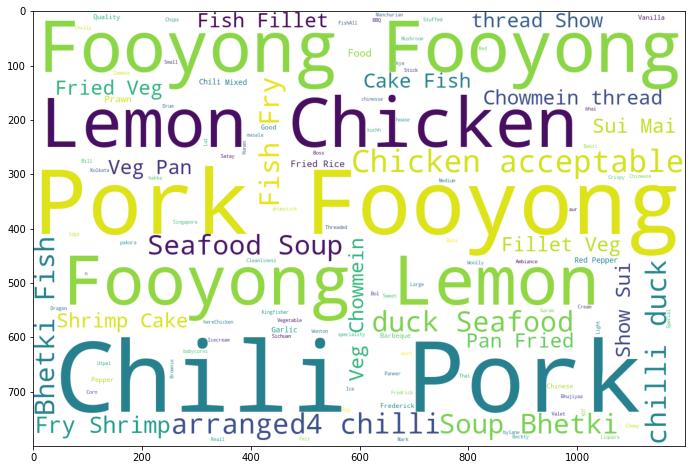

In [ ]:
wc=WordCloud(width=1200,height=800,stopwords=list(STOPWORDS)+["Golden",'Joy',"Robert","Liao"],background_color="white")
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(f))
plt.show()

In [ ]:
text_dictionary = wc.process_text(f)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc.words_

#print results
print(list(word_freq.items())[:20])
print(list(rel_freq.items())[:20])

[('Chili Pork', 190), ('Pork Fooyong', 190), ('Fooyong Fooyong', 190), ('Fooyong Lemon', 190), ('Lemon Chicken', 190), ('Chicken acceptable', 190), ('arranged4 chilli', 190), ('chilli duck', 190), ('duck Seafood', 190), ('Seafood Soup', 190), ('Soup Bhetki', 190), ('Bhetki Fish', 190), ('Fish Fry', 190), ('Fry Shrimp', 190), ('Shrimp Cake', 190), ('Cake Fish', 190), ('Fish Fillet', 190), ('Fillet Veg', 190), ('Veg Pan', 190), ('Pan Fried', 190)]
[('Chili Pork', 1.0), ('Pork Fooyong', 1.0), ('Fooyong Fooyong', 1.0), ('Fooyong Lemon', 1.0), ('Lemon Chicken', 1.0), ('Chicken acceptable', 1.0), ('arranged4 chilli', 1.0), ('chilli duck', 1.0), ('duck Seafood', 1.0), ('Seafood Soup', 1.0), ('Soup Bhetki', 1.0), ('Bhetki Fish', 1.0), ('Fish Fry', 1.0), ('Fry Shrimp', 1.0), ('Shrimp Cake', 1.0), ('Cake Fish', 1.0), ('Fish Fillet', 1.0), ('Fillet Veg', 1.0), ('Veg Pan', 1.0), ('Pan Fried', 1.0)]


**Adjective**

In [ ]:
a=[adj for adj in texts if adj.pos_=="ADJ"]

In [ ]:
f=" ".join(str(v) for v in a)  

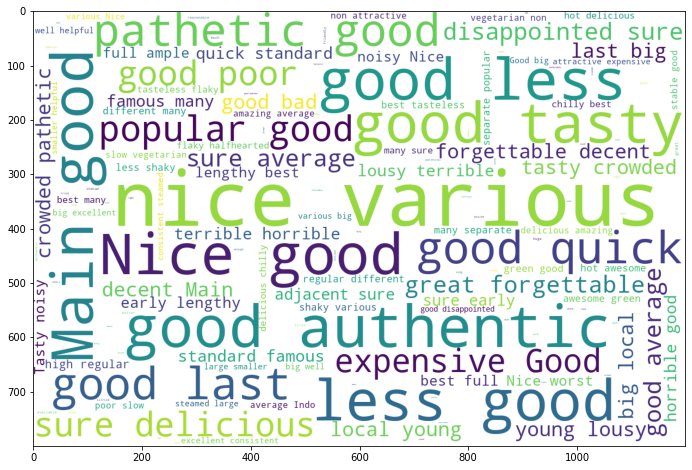

In [ ]:
wc=WordCloud(width=1200,height=800,stopwords=list(STOPWORDS)+["Golden",'Joy',"Chinese"],background_color="white")
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(f))
plt.show()

In [ ]:
text_dictionary = wc.process_text(f)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc.words_

#print results
print(list(word_freq.items())[:20])
print(list(rel_freq.items())[:20])

[('nice various', 380), ('good authentic', 193), ('Main good', 192), ('good less', 192), ('Nice good', 192), ('less good', 191), ('good tasty', 191), ('pathetic good', 191), ('good last', 191), ('good quick', 191), ('popular good', 191), ('sure delicious', 191), ('good poor', 191), ('expensive Good', 191), ('disappointed sure', 190), ('sure average', 190), ('good average', 190), ('great forgettable', 190), ('forgettable decent', 190), ('decent Main', 190)]
[('nice various', 1.0), ('good authentic', 0.5078947368421053), ('Main good', 0.5052631578947369), ('good less', 0.5052631578947369), ('Nice good', 0.5052631578947369), ('less good', 0.5026315789473684), ('good tasty', 0.5026315789473684), ('pathetic good', 0.5026315789473684), ('good last', 0.5026315789473684), ('good quick', 0.5026315789473684), ('popular good', 0.5026315789473684), ('sure delicious', 0.5026315789473684), ('good poor', 0.5026315789473684), ('expensive Good', 0.5026315789473684), ('disappointed sure', 0.5), ('sure a